In [ ]:
import pandas as pd
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, 


from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from utils import calc_confusion_matrix

In [2]:
data = pd.read_csv('data/raw_coordinates.txt', sep='\t')

Train set: (499, 26), (499,)
Test set: (214, 26), (214,)
---
 TRAIN AND TEST: QDA
Accuracy: 0.6636

 Classification report:


/Users/pablo1n7/miniconda3/envs/cannabis/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

          Fr       0.70      0.66      0.68        29
           H       0.38      0.45      0.41        29
           K       0.51      0.63      0.57        30
          Le       0.61      0.59      0.60        29
          Ma       0.74      0.82      0.78        39
          Me       0.90      0.61      0.73        31
          Pa       0.96      0.85      0.90        27

    accuracy                           0.66       214
   macro avg       0.69      0.66      0.67       214
weighted avg       0.69      0.66      0.67       214



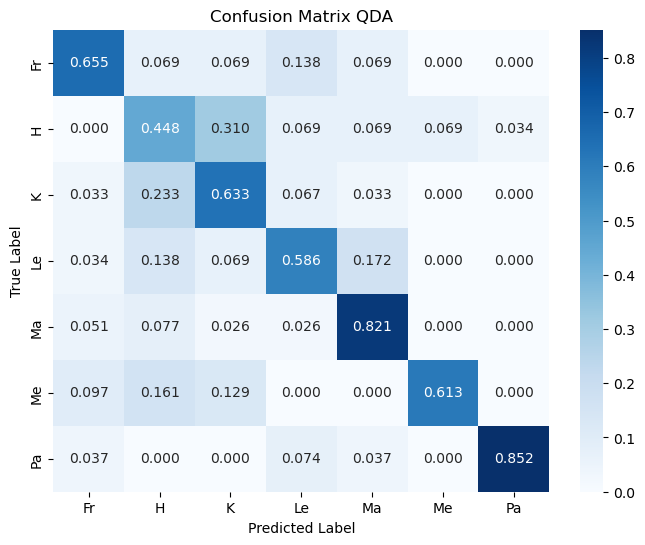

 TRAIN AND TEST: Random Forest
Accuracy: 0.6776

 Classification report:
              precision    recall  f1-score   support

          Fr       0.77      0.83      0.80        29
           H       0.43      0.34      0.38        29
           K       0.41      0.43      0.42        30
          Le       0.69      0.69      0.69        29
          Ma       0.79      0.79      0.79        39
          Me       0.68      0.68      0.68        31
          Pa       0.90      0.96      0.93        27

    accuracy                           0.68       214
   macro avg       0.67      0.68      0.67       214
weighted avg       0.67      0.68      0.67       214



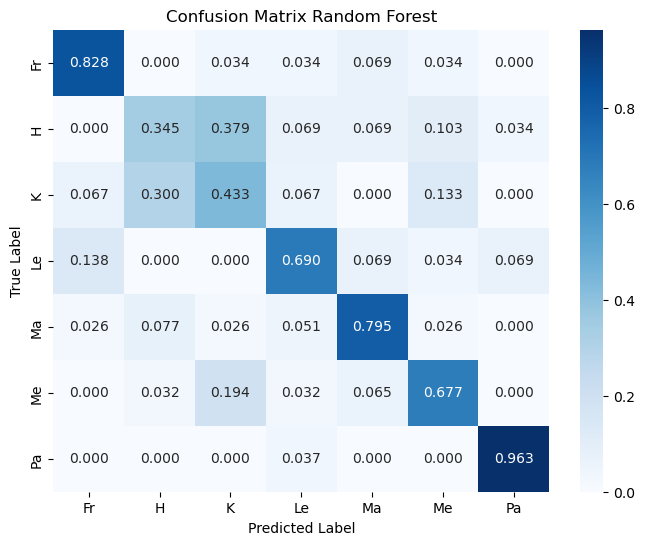

 TRAIN AND TEST: Decision Tree
Accuracy: 0.6262

 Classification report:
              precision    recall  f1-score   support

          Fr       0.68      0.79      0.73        29
           H       0.50      0.38      0.43        29
           K       0.41      0.40      0.41        30
          Le       0.68      0.45      0.54        29
          Ma       0.59      0.77      0.67        39
          Me       0.73      0.77      0.75        31
          Pa       0.81      0.78      0.79        27

    accuracy                           0.63       214
   macro avg       0.63      0.62      0.62       214
weighted avg       0.62      0.63      0.62       214



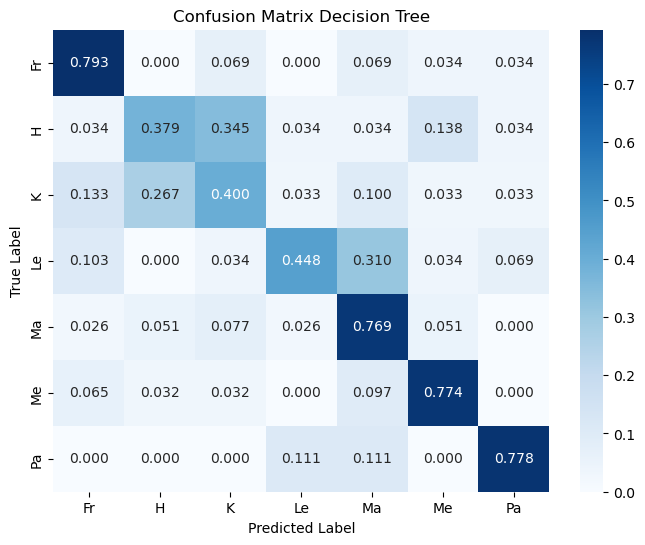

 TRAIN AND TEST: Naive Bayes (Gaussiano)
Accuracy: 0.6355

 Classification report:
              precision    recall  f1-score   support

          Fr       0.88      0.79      0.84        29
           H       0.24      0.14      0.17        29
           K       0.34      0.47      0.39        30
          Le       0.78      0.62      0.69        29
          Ma       0.72      0.74      0.73        39
          Me       0.60      0.68      0.64        31
          Pa       0.84      1.00      0.92        27

    accuracy                           0.64       214
   macro avg       0.63      0.63      0.63       214
weighted avg       0.63      0.64      0.63       214



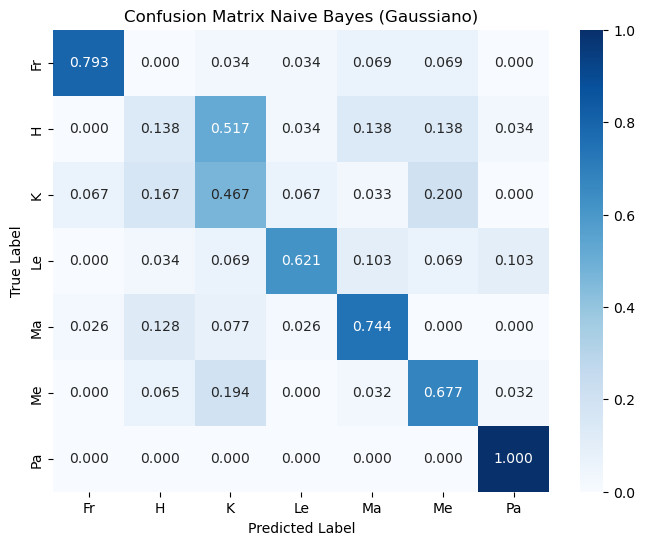

In [3]:
X_train_df, X_test_df = train_test_split(
    data, test_size=0.30, random_state=42, stratify=data['Cultivar'])

target_column = 'Cultivar'
feature_columns = data.columns[2:] 

# train set
x_train = X_train_df[feature_columns].to_numpy()
y_train = X_train_df[target_column].to_numpy()

# test set
x_test = X_test_df[feature_columns].to_numpy()
y_test = X_test_df[target_column].to_numpy() # Esta será tu 'y_test' real

print(f"Train set: {x_train.shape}, {y_train.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")
print("---")


classifiers = {
    "QDA": QuadraticDiscriminantAnalysis(),
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes (Gaussiano)": GaussianNB()
}

results_summary = pd.DataFrame(columns=['Classifier', 'Test Accuracy'])

for name, clf in classifiers.items():
    
    print(f"=============================================")
    print(f" TRAIN AND TEST: {name}")
    print(f"=============================================")
    
    # Entrenar el clasificador
    clf.fit(x_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = clf.predict(x_test)
    
    # Calcular precisión (Accuracy)
    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = clf.score(x_test, y_test)
    
    print(f"Accuracy: {test_accuracy:.4f}")
    
    # Guardar en el resumen
    results_summary.loc[len(results_summary)] = [name, test_accuracy]
    
    # Reporte de Clasificación
    print("\n Classification report:")
    print(classification_report(y_test, y_pred))
    

    calc_confusion_matrix(y_test, y_pred, clf.classes_, f'Confusion Matrix {name}')

In [4]:
print("=============================================")
print(" RESUME ACCURACY")
print("=============================================")


results_summary = results_summary.sort_values(by='Test Accuracy', ascending=False)

print(results_summary.to_string(index=False))

 RESUME ACCURACY
             Classifier  Test Accuracy
          Random Forest       0.677570
                    QDA       0.663551
Naive Bayes (Gaussiano)       0.635514
          Decision Tree       0.626168


In [5]:
print("=============================================")
print(" GRID SEARCH")
print("=============================================")


rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

grid_search.fit(x_train, y_train)

print("Best params:")
print(grid_search.best_params_)
print("---")

 GRID SEARCH
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best params:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
---


In [6]:
print("=============================================")
print(" EVALUATION: CLASSIFICATION REPORT")
print("=============================================")

best_rf = grid_search.best_estimator_

train_accuracy_tuned = best_rf.score(x_train, y_train)
test_accuracy_tuned = best_rf.score(x_test, y_test)

y_pred_tuned = best_rf.predict(x_test)
print(classification_report(y_test, y_pred_tuned))

 EVALUATION: CLASSIFICATION REPORT
              precision    recall  f1-score   support

          Fr       0.74      0.79      0.77        29
           H       0.46      0.41      0.44        29
           K       0.43      0.50      0.46        30
          Le       0.80      0.69      0.74        29
          Ma       0.79      0.79      0.79        39
          Me       0.82      0.74      0.78        31
          Pa       0.87      0.96      0.91        27

    accuracy                           0.70       214
   macro avg       0.70      0.70      0.70       214
weighted avg       0.70      0.70      0.70       214



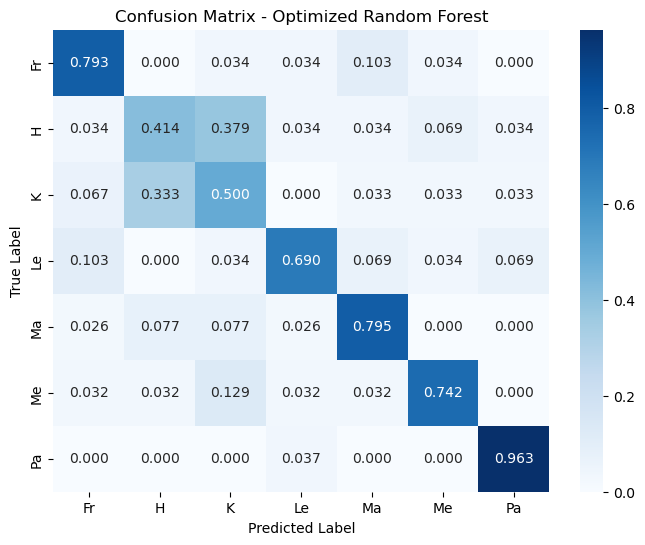

In [7]:
calc_confusion_matrix(y_test, y_pred_tuned, best_rf.classes_, title='Confusion Matrix - Optimized Random Forest')